In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
from scipy import sparse
from scipy.sparse import csgraph

## 稀疏矩阵-sparse

### 稀疏矩阵的储存形式

In [2]:
from scipy import sparse
a = sparse.dok_matrix((10, 5))
a[2:5, 3] = 1.0, 2.0, 3.0
print a.keys()
print a.values()

[(2, 3), (3, 3), (4, 3)]
[1.0, 2.0, 3.0]


In [3]:
b = sparse.lil_matrix((10, 5))
b[2, 3] = 1.0
b[3, 4] = 2.0
b[3, 2] = 3.0
print b.data
print b.rows

[[] [] [1.0] [3.0, 2.0] [] [] [] [] [] []]
[[] [] [3] [2, 4] [] [] [] [] [] []]


In [4]:
row = [2, 3, 3, 2]
col = [3, 4, 2, 3]
data = [1, 2, 3, 10]
c = sparse.coo_matrix((data, (row, col)), shape=(5, 6))
print c.col, c.row, c.data
print c.toarray()

[3 4 2 3] [2 3 3 2] [ 1  2  3 10]
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  3  0  2  0]
 [ 0  0  0  0  0  0]]


### 最短路径

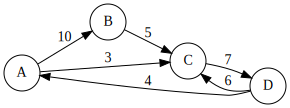

In [4]:
%%dot format=svg 
#%figonly=使用稀疏矩阵可以表示有向图
digraph graph1 {
    rankdir=LR;
    size="8,5"
    node [shape = circle];
    A -> B [ label = "10" ];
    B -> C [ label = "5" ];
    A -> C [ label = "3" ];
    C -> D [ label = "7" ];
    D -> A [ label = "4" ];
    D -> C [ label = "6" ];
}

In [29]:
w = sparse.dok_matrix((4, 4))

edges = [(0, 1, 10), (1, 2, 5), (0, 2, 3),
         (2, 3,  7), (3, 0, 4), (3, 2, 6)]

for i, j, v in edges:
    w[i, j] = v

w.todense()

matrix([[  0.,  10.,   3.,   0.],
        [  0.,   0.,   5.,   0.],
        [  0.,   0.,   0.,   7.],
        [  4.,   0.,   6.,   0.]])

In [2]:
img = pl.imread("maze.png")
sx, sy = (400, 979)
ex, ey = (398,  25)
bimg = np.all(img > 0.81, axis=2) #❶
H, W = bimg.shape

x0, x1 = np.where(bimg[H//2, :]==0)[0][[0, -1]] #❷
bimg[H//2, :x0] = 0
bimg[H//2, x1:] = 0

In [3]:
#上下相邻白色像素
mask = (bimg[1:, :] & bimg[:-1, :]) 
idx = np.where(mask.ravel())[0]
vedge = np.c_[idx, idx + W]
pl.imsave("tmp.png", mask, cmap="gray")

#左右相邻白色像素
mask = (bimg[:, 1:] & bimg[:, :-1])
y, x = np.where(mask)
idx = y * W + x
hedge = np.c_[idx, idx + 1]

edges = np.vstack([vedge, hedge]) #❶

values = np.ones(edges.shape[0])
w = sparse.coo_matrix((values, (edges[:, 0], edges[:, 1])),  #❷
                      shape=(bimg.size, bimg.size))

In [4]:
from scipy.sparse import csgraph
startid = sy * W + sx
endid   = ey * W + ex
d, p = csgraph.dijkstra(w, indices=[startid], return_predecessors=True, directed=False)
%C d.shape; p.shape

  d.shape      p.shape  
-----------  -----------
(1, 801600)  (1, 801600)


In [143]:
np.isinf(d[0]).sum()

322324

In [144]:
path = []
node_id = endid
while True:
    path.append(node_id)
    if node_id == startid or node_id < 0:
        break
    node_id = p[0, node_id]
path = np.array(path)

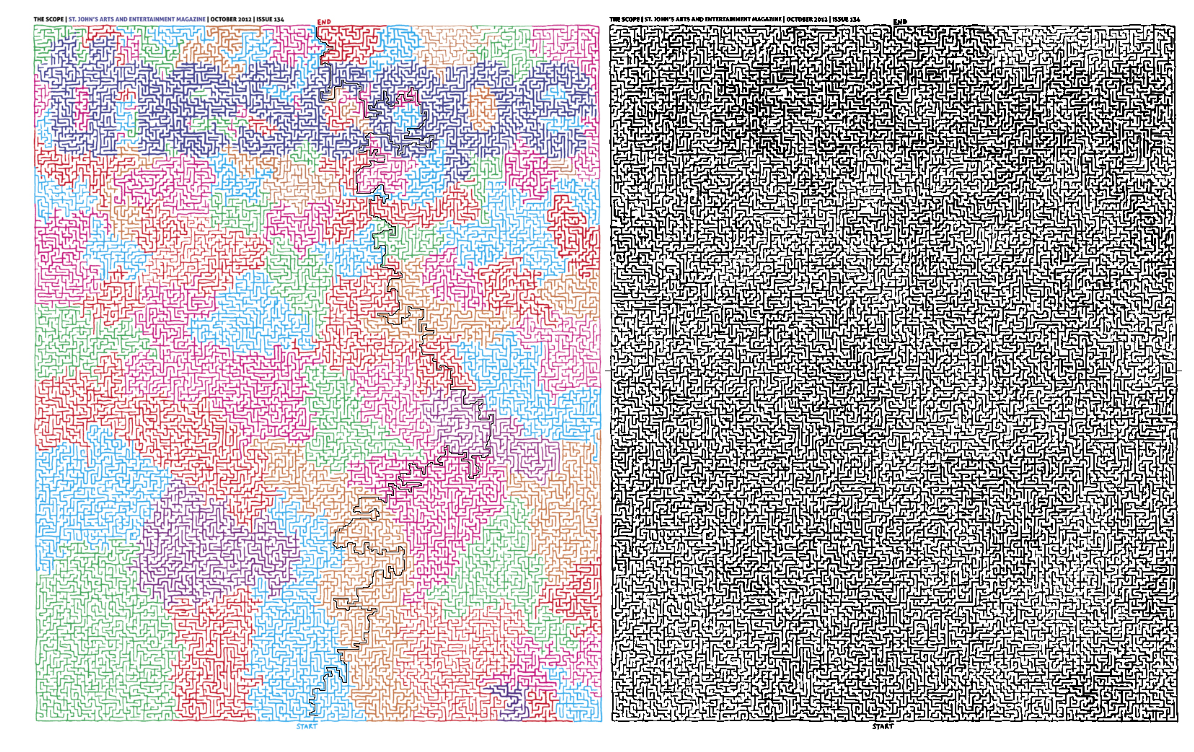

In [145]:
#%figonly=用dijkstra计算最短路径
x, y = path % W, path // W
img[y, x, :] = 0
fig, axes = pl.subplots(1, 2, figsize=(16, 12))
axes[0].imshow(img)
axes[1].imshow(bimg, cmap="gray")
for ax in axes:
    ax.axis("off")
fig.subplots_adjust(0, 0, 1, 1, 0, 0)

> **SOURCE**

> `scpy2.scipy.hrd_solver`使用`csgraph`计算华容道游戏【横刀立马】布局步数最少的解法。

In [1]:
#%hide
%exec_python -m scpy2.scipy.hrd_solver